In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
%matplotlib inline

In [146]:
status_features = ['destination', 'Origin','applied', \
                   'accepted', 'Rejected', 'decisions', 'Year']
number_features = ['destination', 'Origin', 'Year', 'Month', 'Value']
unique_features = ['destination', 'Origin', 'applied', 'accepted', 'Rejected', 'decisions',\
                  'Year', 'Month', 'Value']
responses = ['Value']

numeric_features = ['applied', 'accepted', 'Rejected', 'decisions', 'Year', 'Value',\
                   'last_month', 'two_months_ago', 'next_month', 'two_months_later', 'deaths']


file1 = './data/status_asylum_seekers_99_18_wItalty.csv'
file2 = './data/numbers_sylum_seekers_monthly_99_18_wItaly.csv'
status = pd.read_csv(file1, skipinitialspace=True)
number = pd.read_csv(file2, skipinitialspace=True)

/Users/jasonterry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


KeyError: 'applied'

In [3]:
print(list(status))
status.head()

['Year', 'Country / territory of asylum/residence', 'Origin', 'RSD procedure type / level', 'Tota pending start-year', 'of which UNHCR-assisted', 'Applied during year', 'statistics.filter.decisions_recognized', 'statistics.filter.decisions_other', 'Rejected', 'Otherwise closed', 'Total decisions', 'Total pending end-year', 'of which UNHCR-assisted.1']


Year Country / territory of asylum/residence       Origin  \
0  2000                United States of America  Afghanistan   
1  2000                United States of America  Afghanistan   
2  2000                                   Italy  Afghanistan   
3  2000                          United Kingdom  Afghanistan   
4  2000                          United Kingdom  Afghanistan   

  RSD procedure type / level Tota pending start-year  of which UNHCR-assisted  \
0                     G / IN                     193                      0.0   
1                     G / EO                     196                      0.0   
2                     G / FA                       0                      0.0   
3                     G / FI                       0                      0.0   
4                     G / BL                       0                      0.0   

  Applied during year statistics.filter.decisions_recognized  \
0                 218                                    182   
1                 225                                    151   
2                 524                                     30   
3                5555                                    375   
4                   0                                      0   

  statistics.filter.decisions_other Rejected Otherwise closed Total decisions  \
0                                 0       51               40             273   
1                                 0       31               68             250   
2                                 0      321                0             351   
3                               695      460             1055            2585   
4                                10        0                0              10   

  Total pending end-year  of which UNHCR-assisted.1  
0                    150                        0.0  
1                    171                        0.0  
2                      0                        0.0  
3                      0                        0.0  
4                      0                        0.0

In [4]:
print(list(number))
number.head()

['Country / territory of asylum/residence', 'Origin', 'Year', 'Month', 'Value']


Country / territory of asylum/residence       Origin  Year     Month Value
0                                  Canada  Afghanistan  1999   January    62
1                                  Canada  Afghanistan  1999  February    32
2                                  Canada  Afghanistan  1999     March    25
3                                  Canada  Afghanistan  1999     April    20
4                                  Canada  Afghanistan  1999       May    26

### Features
all of those in number

from status:

'Country / territory of asylum/residence', 'Origin','Applied during year', 'statistics.filter.decisions_recognized', 'statistics.filter.decisions_other', 'Rejected', 'Otherwise closed', 'Total decisions'

'USA (INS/DHS)', 'USA (EOIR)', 'United Stated States of America' = 'USA'

United Kingdom of Great Britain and Northern Ireland', 'United Kingdom' = 'UK'

Get rid of Canada?

In [147]:
number['destination'] = number['Country / territory of asylum/residence']
status['destination'] = status['Country / territory of asylum/residence']
status['accepted'] = status['statistics.filter.decisions_recognized']
status['applied'] = status['Applied during year']
status['decisions'] = status['Total decisions']

status.ix[status.destination == 'United States of America', ['destination']] = 'USA'
status.ix[status.destination == 'United Kingdom', ['destination']] = 'UK'
number.ix[number.destination == 'USA (INS/DHS)', ['destination']] = 'USA'
number.ix[number.destination == 'USA (EOIR)', ['destination']] = 'USA'
number.ix[number.destination == 'United Kingdom of Great Britain and Northern Ireland', ['destination']] = 'UK'

/Users/jasonterry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/Users/jasonterry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/jasonterry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/Users/jasonterry/anaconda3/lib/py

In [149]:
for feature in numeric_features:
    if feature in status_features:
        try:
            status.ix[status[feature] == '*'] = None
        except:
            trash = None
        status[feature] = pd.to_numeric(status[feature])
    if feature in number_features:
        try:
            number.ix[number[feature] == '*'] = None
        except:
            trash = None
        number[feature] = pd.to_numeric(number[feature])

/Users/jasonterry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/Users/jasonterry/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/Users/jasonterry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


In [131]:
status = status.fillna(0)
status.head()

Year Country / territory of asylum/residence       Origin  \
0  2000                United States of America  Afghanistan   
1  2000                United States of America  Afghanistan   
2  2000                                   Italy  Afghanistan   
3  2000                          United Kingdom  Afghanistan   
4  2000                          United Kingdom  Afghanistan   

  RSD procedure type / level Tota pending start-year  of which UNHCR-assisted  \
0                     G / IN                     193                      0.0   
1                     G / EO                     196                      0.0   
2                     G / FA                       0                      0.0   
3                     G / FI                       0                      0.0   
4                     G / BL                       0                      0.0   

  Applied during year statistics.filter.decisions_recognized  \
0                 218                                    182   
1                 225                                    151   
2                 524                                     30   
3                5555                                    375   
4                   0                                      0   

  statistics.filter.decisions_other Rejected Otherwise closed Total decisions  \
0                                 0       51               40             273   
1                                 0       31               68             250   
2                                 0      321                0             351   
3                               695      460             1055            2585   
4                                10        0                0              10   

  Total pending end-year  of which UNHCR-assisted.1 destination accepted  \
0                    150                        0.0         USA      182   
1                    171                        0.0         USA      151   
2                      0                        0.0       Italy       30   
3                      0                        0.0          UK      375   
4                      0                        0.0          UK        0   

  applied decisions  
0     218       273  
1     225       250  
2     524       351  
3    5555      2585  
4       0        10

In [136]:
# status.head()
status = status[status_features]
status.query("destination == \'Germany\' and Origin == \'Myanmar\'").head()

destination   Origin applied accepted Rejected decisions  Year
12      Germany  Myanmar       3        0        0         0  2000
13      Germany  Myanmar     136       43       46        90  2000
59      Germany  Myanmar       2        0        0         1  2001
60      Germany  Myanmar     114      126       12       145  2001
105     Germany  Myanmar      57       25       16        46  2002

In [135]:
list(status.accepted)

['182',
 '151',
 '30',
 '375',
 '0',
 '156',
 '0',
 '31',
 '436',
 '81',
 '307',
 '5',
 '0',
 '43',
 '13',
 '65',
 '429',
 '31',
 '110',
 '0',
 '16',
 '5',
 '5',
 '227',
 '410',
 '1689',
 '9',
 '5310',
 '0',
 '52',
 '0',
 '0',
 '454',
 '18',
 '26',
 '3',
 '9',
 '18',
 '258',
 '62',
 '35',
 '13',
 '0',
 '0',
 '4',
 '33',
 '129',
 '212',
 '81',
 '2260',
 '10',
 '184',
 '2656',
 '4576',
 '305',
 '120',
 '1238',
 '3',
 '5',
 '0',
 '126',
 '9',
 '77',
 '410',
 '22',
 '120',
 '7',
 '57',
 '5',
 '0',
 '241',
 '1010',
 '349',
 '22',
 '2845',
 '9',
 '48',
 '1',
 '4',
 '516',
 '17',
 '17',
 '0',
 '10',
 '53',
 '258',
 '14',
 '39',
 '29',
 '19',
 '0',
 '0',
 '9',
 '34',
 '217',
 '21',
 '3',
 '89',
 '4',
 '115',
 '230',
 '8',
 '74',
 '123',
 '10',
 '25',
 '0',
 '7',
 '1',
 '310',
 '126',
 '244',
 '3',
 '16',
 '13',
 '10',
 '70',
 '225',
 '28',
 '360',
 '86',
 '549',
 '0',
 '0',
 '2',
 '38',
 '2515',
 '1065',
 '7',
 '236',
 '369',
 '51',
 '157',
 '22',
 '3',
 '20',
 '17',
 '10',
 '20',
 '16',
 '0',

In [150]:
status = status.groupby(['Year', 'Origin', 'destination'])\
                .agg({'applied':np.sum, 'accepted':np.sum, 'Rejected':np.sum, 'decisions':np.sum})

In [151]:
status

applied  accepted  Rejected  decisions
Year   Origin           destination                                        
2000.0 Afghanistan      Canada         488.0     436.0      31.0      490.0
                        France         244.0     156.0      48.0      204.0
                        Germany      11136.0      31.0    2467.0     3447.0
                        Italy          524.0      30.0     321.0      351.0
                        UK            5555.0     375.0     460.0     2595.0
                        USA            443.0     333.0      82.0      523.0
       Myanmar          Canada          11.0      13.0       2.0       15.0
                        France          26.0       5.0      18.0       23.0
                        Germany        139.0      43.0      46.0       90.0
                        USA            808.0     388.0     173.0      674.0
       Somalia          Canada         753.0     454.0      31.0      581.0
                        France         109.0      52.0      28.0       80.0
                        Germany        413.0       0.0     270.0      440.0
                        Italy           69.0       9.0      78.0       87.0
                        UK            5020.0    5310.0     695.0    11325.0
                        USA           4132.0    2099.0    1398.0     4458.0
       Sudan            Canada         376.0     227.0      39.0      282.0
                        France          92.0      16.0      33.0       49.0
                        Germany        209.0      10.0     146.0      206.0
                        Italy           40.0      31.0      25.0       56.0
                        UK             415.0     110.0     270.0      900.0
                        USA            790.0     494.0     180.0      798.0
       Syrian Arab Rep. Canada          80.0      62.0      35.0      102.0
                        France          18.0       9.0       7.0       16.0
                        Germany       3069.0     276.0    2084.0     2858.0
                        Italy           48.0       3.0      44.0       47.0
                        USA            123.0      44.0      39.0      166.0
       Yemen            Canada          90.0      33.0      14.0       50.0
                        Germany        105.0       4.0     149.0      161.0
                        Italy            0.0       0.0       1.0        1.0
...                                      ...       ...       ...        ...
2017.0 Afghanistan      Germany      18282.0   18950.0   61311.0   134963.0
                        Italy         1010.0     361.0     169.0     2156.0
                        UK            2759.0    1080.0    1410.0     3108.0
                        USA            177.0     125.0      51.0      217.0
       Myanmar          France          83.0       0.0       0.0        0.0
                        Germany        113.0     137.0      46.0      259.0
                        UK              76.0      16.0      55.0       77.0
                        USA            330.0      41.0      37.0       98.0
       Somalia          Canada         956.0     378.0     240.0      749.0
                        France        1336.0     133.0     709.0     1307.0
                        Germany       7561.0    4979.0    2631.0    20937.0
                        Italy         1989.0     812.0      66.0     2318.0
                        UK             469.0     249.0     225.0      527.0
                        USA            279.0     132.0     136.0      331.0
       Sudan            Canada         693.0     366.0      42.0      423.0
                        France        7417.0    3744.0    3872.0     8709.0
                        Germany       1635.0     703.0     813.0     4063.0
                        Italy          468.0      78.0      80.0      456.0
                        UK            2113.0    1027.0     385.0     1694.0
                        USA            257.0      76.0      60.0      207.0
       Sy

### Merge
Merge so that every row is maps to the one with the same year, desistination, and origin

Status data is yearly, so it is assigned the same to each 

In [152]:
merged = pd.merge(number, status, left_on=['destination', 'Origin', 'Year'], \
                  right_on=['destination', 'Origin', 'Year'], how='inner')

In [154]:
merged.query("destination == \'Germany\' and Origin == \'Myanmar\'")

Country / territory of asylum/residence   Origin    Year      Month  \
3759                                 Germany  Myanmar  2000.0    January   
3760                                 Germany  Myanmar  2000.0   February   
3761                                 Germany  Myanmar  2000.0        May   
3762                                 Germany  Myanmar  2000.0       June   
3763                                 Germany  Myanmar  2000.0       July   
3764                                 Germany  Myanmar  2000.0     August   
3765                                 Germany  Myanmar  2000.0  September   
3766                                 Germany  Myanmar  2000.0    October   
3767                                 Germany  Myanmar  2000.0   November   
3768                                 Germany  Myanmar  2000.0   December   
3769                                 Germany  Myanmar  2001.0    January   
3770                                 Germany  Myanmar  2001.0   February   
3771                                 Germany  Myanmar  2001.0      March   
3772                                 Germany  Myanmar  2001.0      April   
3773                                 Germany  Myanmar  2001.0        May   
3774                                 Germany  Myanmar  2001.0       June   
3775                                 Germany  Myanmar  2001.0       July   
3776                                 Germany  Myanmar  2001.0     August   
3777                                 Germany  Myanmar  2001.0  September   
3778                                 Germany  Myanmar  2001.0    October   
3779                                 Germany  Myanmar  2001.0   November   
3780                                 Germany  Myanmar  2001.0   December   
3781                                 Germany  Myanmar  2002.0    January   
3782                                 Germany  Myanmar  2002.0   February   
3783                                 Germany  Myanmar  2002.0      April   
3784                                 Germany  Myanmar  2002.0        May   
3785                                 Germany  Myanmar  2002.0       June   
3786                                 Germany  Myanmar  2002.0       July   
3787                                 Germany  Myanmar  2002.0     August   
3788                                 Germany  Myanmar  2002.0  September   
...                                      ...      ...     ...        ...   
3931                                 Germany  Myanmar  2015.0      March   
3932                                 Germany  Myanmar  2015.0      April   
3933                                 Germany  Myanmar  2015.0        May   
3934                                 Germany  Myanmar  2015.0       June   
3935                                 Germany  Myanmar  2015.0       July   
3936                                 Germany  Myanmar  2015.0     August   
3937                                 Germany  Myanmar  2015.0  September   
3938                                 Germany  Myanmar  2015.0    October   
3939                                 Germany  Myanmar  2015.0   November   
3940                                 Germany  Myanmar  2015.0   December   
3941                                 Germany  Myanmar  2016.0    January   
3942                                 Germany  Myanmar  2016.0   February   
3943                                 Germany  Myanmar  2016.0      March   
3944                                 Germany  Myanmar  2016.0      April   
3945                                 Germany  Myanmar  2016.0        May   
3946                                 Germany  Myanmar  2016.0       June   
3947                                 Germany  Myanmar  2016.0       July   
3948                                 Germany  Myanmar  2016.0     August   
3949                                 Germany  Myanmar  2016.0  September   
3950                                 Germany  Myanmar  2016.0    October   
3951                                 Germany  Myanmar

In [87]:
# final = merged[unique_features]
final = number[number_features]
final.head(10)

destination       Origin  Year      Month Value
0      Canada  Afghanistan  1999    January    62
1      Canada  Afghanistan  1999   February    32
2      Canada  Afghanistan  1999      March    25
3      Canada  Afghanistan  1999      April    20
4      Canada  Afghanistan  1999        May    26
5      Canada  Afghanistan  1999       June    45
6      Canada  Afghanistan  1999       July    47
7      Canada  Afghanistan  1999     August    41
8      Canada  Afghanistan  1999  September    53
9      Canada  Afghanistan  1999    October    54

In [96]:
final.to_csv('./data/merged_trimmed.csv')
# final.head(10)
final.query("destination == \'Germany\' and Origin == \'Myanmar\' and Year == 2000")

destination   Origin  Year      Month Value
4182     Germany  Myanmar  2000    January     9
4183     Germany  Myanmar  2000   February     1
4184     Germany  Myanmar  2000        May     5
4185     Germany  Myanmar  2000       June    20
4186     Germany  Myanmar  2000       July    10
4187     Germany  Myanmar  2000     August    21
4188     Germany  Myanmar  2000  September    21
4189     Germany  Myanmar  2000    October    20
4190     Germany  Myanmar  2000   November    23
4191     Germany  Myanmar  2000   December     5

### Battle deaths

In [106]:
file_name = './data/battle_deaths.csv'
b_deaths = pd.read_csv(file_name, skipinitialspace=True)

In [107]:
bd_features = ['year', 'deaths', 'battle_location']
b_deaths = b_deaths[bd_features]
b_deaths = b_deaths[b_deaths['year']>1999]

In [108]:
b_deaths.ix[b_deaths.battle_location.str.contains('Yemen'), ['battle_location']] = 'Yemen'
b_deaths.ix[b_deaths.battle_location.str.contains('Syria'), ['battle_location']] = 'Syrian Arab Rep.'
b_deaths.ix[b_deaths.battle_location.str.contains('Somalia'), ['battle_location']] = 'Somalia'
b_deaths.ix[b_deaths.battle_location.str.contains('Myanmar'), ['battle_location']] = 'Myanmar'
b_deaths.ix[b_deaths.battle_location.str.contains('Afghanistan'), ['battle_location']] = 'Afghanistan'
b_deaths.ix[b_deaths.battle_location.str.contains('Sudan'), ['battle_location']] = 'Sudan'

/Users/jasonterry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/jasonterry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/jasonterry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from th

In [109]:
b_deaths = b_deaths.query("battle_location == \'Somalia\' \
                            or battle_location == \'Sudan\'\
                            or battle_location == \'Yemen\'\
                            or battle_location == \'Syrian Arab Rep.\'\
                            or battle_location == \'Myanmar\'\
                            or battle_location == \'Afghanistan\'")

In [110]:
b_deaths = b_deaths.groupby(['battle_location', 'year'])\
        .agg({'deaths':np.sum})

In [112]:
b_deaths

deaths
battle_location  year        
Afghanistan      2000    5235
                 2001    5308
                 2002     908
                 2003     714
                 2004    1089
                 2005    1736
                 2006    4980
                 2007    6843
                 2008    5655
                 2009    6381
                 2010    7342
                 2011   10023
                 2012    7728
                 2013    8048
                 2014   12346
                 2015   19209
                 2016   18317
                 2017   19412
Myanmar          2000     226
                 2001     215
                 2002     294
                 2003      38
                 2004      27
                 2005     142
                 2006     244
                 2007     348
                 2008      64
                 2009     190
                 2010     157
                 2011     713
...                       ...
Sudan            2006    1223
                 2007     217
                 2008     651
                 2009     591
                 2010    1172
                 2011    1756
                 2012    1677
                 2013    1519
                 2014    2523
                 2015    1757
                 2016    2049
                 2017     593
Syrian Arab Rep. 2004     379
                 2011     964
                 2012   38505
                 2013   69089
                 2014   69712
                 2015   56866
                 2016   53565
                 2017   21837
Yemen            2008     290
                 2009      94
                 2010     175
                 2011    1140
                 2012    2330
                 2013     582
                 2014    1660
                 2015    6778
                 2016    2557
                 2017   16134

[87 rows x 1 columns]

In [111]:
b_deaths.query("battle_location == \'Myanmar\' and year == 2000")

deaths
battle_location year        
Myanmar         2000     226

In [113]:
all_merged = pd.merge(final, b_deaths, left_on=['Origin', 'Year'], \
                  right_on=['battle_location', 'year'])
# all_merged = all_merged[['destination', 'Origin', 'applied', 'accepted', 'Rejected', 'decisions',\
#                     'Year', 'Month', 'Value', 'deaths']]
all_merged = all_merged[['destination', 'Origin','Year', 'Month', 'Value', 'deaths']]
all_merged.deaths = pd.to_numeric(all_merged.deaths)
all_merged.to_csv('./data/merged_stats_deaths_numbers.csv')

In [114]:
all_merged.head(10)

destination       Origin  Year      Month Value  deaths
0      Canada  Afghanistan  2000    January    24    5235
1      Canada  Afghanistan  2000   February    29    5235
2      Canada  Afghanistan  2000      March    55    5235
3      Canada  Afghanistan  2000      April    18    5235
4      Canada  Afghanistan  2000        May    28    5235
5      Canada  Afghanistan  2000       June    35    5235
6      Canada  Afghanistan  2000       July    61    5235
7      Canada  Afghanistan  2000     August    47    5235
8      Canada  Afghanistan  2000  September    63    5235
9      Canada  Afghanistan  2000    October    36    5235

In [114]:
# other_features = ['last_month', 'two_months_ago'] 
# other_responses = ['next_month', 'two_months_later']
# unique_features.extend(other_features)
# responses.extend(other_responses)

In [137]:
all_merged.query("destination == \'Germany\' and Origin == \'Myanmar\'").head()

destination   Origin  Year     Month Value  deaths
1348     Germany  Myanmar  2000   January     9     226
1349     Germany  Myanmar  2000  February     1     226
1350     Germany  Myanmar  2000       May     5     226
1351     Germany  Myanmar  2000      June    20     226
1352     Germany  Myanmar  2000      July    10     226

In [18]:
all_merged.Origin.unique()

array(['Afghanistan', 'Myanmar', 'Somalia', 'Sudan', 'Syrian Arab Rep.',
       'Yemen'], dtype=object)

### Group

Group by pairwise destinations and origins

In [61]:
# groups = final.groupby(['Origin', 'destination'])
groups = all_merged.groupby(['Origin', 'destination'])

In [54]:
group_dict = {}
for (name, df) in groups:
    for feature in numeric_features:
        if type(list(df[feature])[0]) is str:
            df.ix[df[feature] == '*', [feature]] = None
    df = df.fillna(method='pad')
    for feature in numeric_features:
        df[feature] = pd.to_numeric(df[feature])
    group_dict[name] = df

/Users/jasonterry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/jasonterry/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [55]:
for group in group_dict:
    group_dict[group]['last_month'] = group_dict[group].Value.shift(1)
    group_dict[group]['two_months_ago'] = group_dict[group].Value.shift(2)
    group_dict[group]['next_month'] = group_dict[group].Value.shift(-1)
    group_dict[group]['two_months_later'] = group_dict[group].Value.shift(-2) 
    group_dict[group] = group_dict[group].iloc[2:len(group_dict[group].Value)-2, :]

In [ ]:
# for group in group_dict:
#     group_dict[group] = group_dict[group].iloc[2:len(group_dict[group].Value) - 2]
#     group_dict[name].ix[group_dict[name].Value == '*', ['Value']] = None
#     group_dict[name].ix[group_dict[name].last_month == '*', ['last_month']] = None
#     group_dict[name].ix[group_dict[name].two_months_ago == '*', ['two_months_ago']] = None
#     group_dict[name].ix[group_dict[name].next_month == '*', ['next_month']] = None
#     group_dict[name].ix[group_dict[name].two_months_later == '*', ['two_months_later']] = None
#     for feature in numeric_features:
#         print(feature)
#         group_dict[name][feature].fillna('bfill')
#         group_dict[name][feature] = pd.to_numeric(group_dict[name][feature])   

In [57]:
group_dict[list(group_dict.keys())[8]].head(15)

destination   Origin  applied  accepted  Rejected  decisions  Year  \
5321     Germany  Myanmar        3         0         0          0  2000   
5322     Germany  Myanmar      136        43        46         90  2000   
5323     Germany  Myanmar      136        43        46         90  2000   
5324     Germany  Myanmar      136        43        46         90  2000   
5325     Germany  Myanmar        3         0         0          0  2000   
5326     Germany  Myanmar        3         0         0          0  2000   
5327     Germany  Myanmar        3         0         0          0  2000   
5328     Germany  Myanmar      136        43        46         90  2000   
5329     Germany  Myanmar      136        43        46         90  2000   
5330     Germany  Myanmar      136        43        46         90  2000   
5331     Germany  Myanmar        3         0         0          0  2000   
5332     Germany  Myanmar        3         0         0          0  2000   
5333     Germany  Myanmar        3         0         0          0  2000   
5334     Germany  Myanmar      136        43        46         90  2000   
5335     Germany  Myanmar      136        43        46         90  2000   

         Month  Value  deaths  last_month  two_months_ago  next_month  \
5321   January      9      43         9.0             9.0         9.0   
5322   January      9     114         9.0             9.0         9.0   
5323   January      9      69         9.0             9.0         9.0   
5324   January      9      43         9.0             9.0         1.0   
5325  February      1     114         9.0             9.0         1.0   
5326  February      1      69         1.0             9.0         1.0   
5327  February      1      43         1.0             1.0         1.0   
5328  February      1     114         1.0             1.0         1.0   
5329  February      1      69         1.0             1.0         1.0   
5330  February      1      43         1.0             1.0         5.0   
5331       May      5     114         1.0             1.0         5.0   
5332       May      5      69         5.0             1.0         5.0   
5333       May      5      43         5.0             5.0         5.0   
5334       May      5     114         5.0             5.0         5.0   
5335       May      5      69         5.0             5.0         5.0   

      two_months_later  
5321               9.0  
5322               9.0  
5323               1.0  
5324               1.0  
5325               1.0  
5326               1.0  
5327               1.0  
5328               1.0  
5329               5.0  
5330               5.0  
5331               5.0  
5332               5.0  
5333               5.0  
5334               5.0  
5335              20.0

In [ ]:
numeric_features = ['applied', 'accepted', 'Rejected', 'decisions', 'Year', 'Value',\
                    'last_month', 'two_months_ago', 'next_month', 'two_months_later']

In [32]:
group_dict.keys()

dict_keys([('Afghanistan', 'Canada'), ('Afghanistan', 'France'), ('Afghanistan', 'Germany'), ('Afghanistan', 'Italy'), ('Afghanistan', 'UK'), ('Afghanistan', 'USA'), ('Myanmar', 'Canada'), ('Myanmar', 'France'), ('Myanmar', 'Germany'), ('Myanmar', 'Italy'), ('Myanmar', 'UK'), ('Myanmar', 'USA'), ('Somalia', 'Canada'), ('Somalia', 'France'), ('Somalia', 'Germany'), ('Somalia', 'Italy'), ('Somalia', 'UK'), ('Somalia', 'USA'), ('Sudan', 'Canada'), ('Sudan', 'France'), ('Sudan', 'Germany'), ('Sudan', 'Italy'), ('Sudan', 'UK'), ('Sudan', 'USA'), ('Syrian Arab Rep.', 'Canada'), ('Syrian Arab Rep.', 'France'), ('Syrian Arab Rep.', 'Germany'), ('Syrian Arab Rep.', 'Italy'), ('Syrian Arab Rep.', 'UK'), ('Syrian Arab Rep.', 'USA'), ('Yemen', 'Canada'), ('Yemen', 'France'), ('Yemen', 'Germany'), ('Yemen', 'Italy'), ('Yemen', 'UK'), ('Yemen', 'USA')])

In [74]:
len(group_dict[('Syrian Arab Rep.', 'Germany')].Value)

584

In [79]:
xticks_years = [2000 + i for i in range(8)]
# group_dict[('Syrian Arab Rep.', 'Italy')].head(20)
for group in group_dict:
    print(list(group_dict[group].Year)[0], list(group_dict[group].Month)[0], group)

2000 March ('Afghanistan', 'Canada')
2000 March ('Afghanistan', 'France')
2000 February ('Afghanistan', 'Germany')
2008 March ('Afghanistan', 'Italy')
2000 February ('Afghanistan', 'UK')
2005 March ('Afghanistan', 'USA')
2000 March ('Myanmar', 'Canada')
2000 March ('Myanmar', 'France')
2000 February ('Myanmar', 'Germany')
2008 May ('Myanmar', 'Italy')
2003 March ('Myanmar', 'UK')
2000 February ('Myanmar', 'USA')
2000 March ('Somalia', 'Canada')
2000 March ('Somalia', 'France')
2000 February ('Somalia', 'Germany')
2008 March ('Somalia', 'Italy')
2000 February ('Somalia', 'UK')
2000 February ('Somalia', 'USA')
2000 March ('Sudan', 'Canada')
2000 March ('Sudan', 'France')
2000 February ('Sudan', 'Germany')
2008 March ('Sudan', 'Italy')
2000 February ('Sudan', 'UK')
2000 February ('Sudan', 'USA')
2000 April ('Syrian Arab Rep.', 'Canada')
2000 April ('Syrian Arab Rep.', 'France')
2000 February ('Syrian Arab Rep.', 'Germany')
2008 March ('Syrian Arab Rep.', 'Italy')
2003 March ('Syrian Arab 

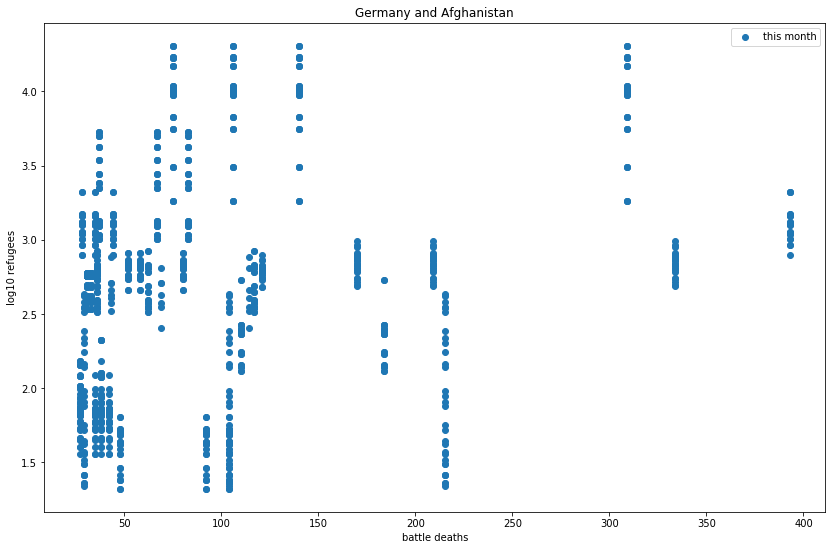

In [145]:
plt.figure(figsize=(14,9))
plt.scatter(group_dict[('Afghanistan', 'Germany')].deaths, \
            np.log10(group_dict[('Afghanistan', 'Germany')].Value), label ='this month' )
# plt.scatter([i for i in range(len(group_dict[('Syrian Arab Rep.', 'Germany')]))], \
#             np.log10(group_dict[('Syrian Arab Rep.', 'Germany')].next_month), label ='next month' )
# plt.scatter([i for i in range(len(group_dict[('Syrian Arab Rep.', 'Germany')]))], \
#             np.log10(group_dict[('Syrian Arab Rep.', 'Germany')].two_months_later), label ='two months later' )
plt.title('Germany and Afghanistan')
plt.ylabel('log10 refugees')
plt.xlabel('battle deaths')
plt.legend(loc='best')

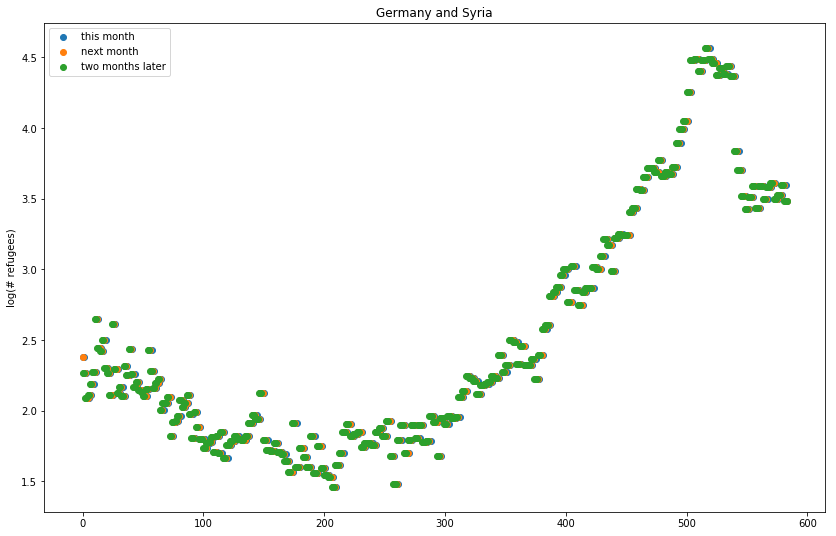

In [35]:
plt.figure(figsize=(14,9))
plt.scatter([i for i in range(len(group_dict[('Syrian Arab Rep.', 'Germany')]))], \
            np.log10(group_dict[('Syrian Arab Rep.', 'Germany')].Value), label ='this month' )
plt.scatter([i for i in range(len(group_dict[('Syrian Arab Rep.', 'Germany')]))], \
            np.log10(group_dict[('Syrian Arab Rep.', 'Germany')].next_month), label ='next month' )
plt.scatter([i for i in range(len(group_dict[('Syrian Arab Rep.', 'Germany')]))], \
            np.log10(group_dict[('Syrian Arab Rep.', 'Germany')].two_months_later), label ='two months later' )
plt.title('Germany and Syria')
plt.ylabel('log(# refugees)')
plt.legend(loc='best')
# for (name, group) in groups:
#     plt.scatter(group.Month, group.Value, label = name)
# plt.legend(loc='best')
# plt.show()

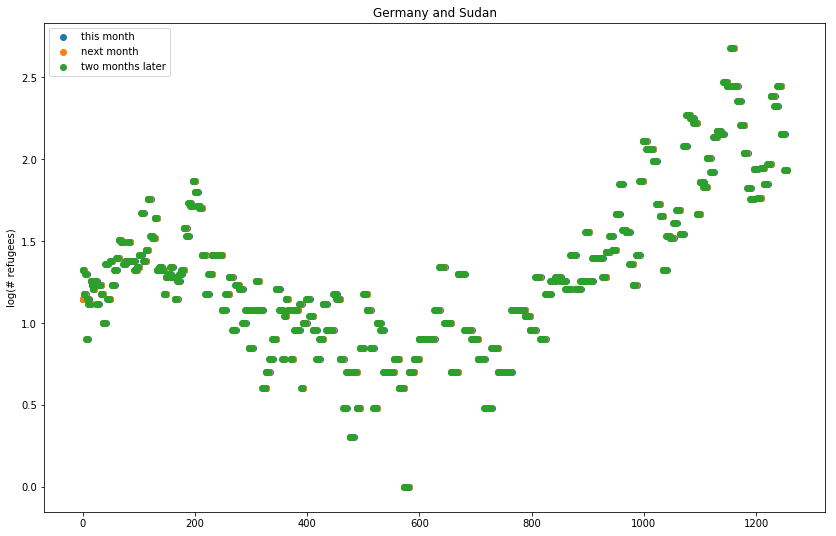

In [19]:
plt.figure(figsize=(14,9))
plt.scatter([i for i in range(len(group_dict[('Sudan', 'Germany')]))], \
            np.log10(group_dict[('Sudan', 'Germany')].Value), label ='this month' )
plt.scatter([i for i in range(len(group_dict[('Sudan', 'Germany')]))], \
            np.log10(group_dict[('Sudan', 'Germany')].next_month), label ='next month' )
plt.scatter([i for i in range(len(group_dict[('Sudan', 'Germany')]))], \
            np.log10(group_dict[('Sudan', 'Germany')].two_months_later), label ='two months later' )
plt.title('Germany and Sudan')
plt.ylabel('log(# refugees)')
plt.legend(loc='best')

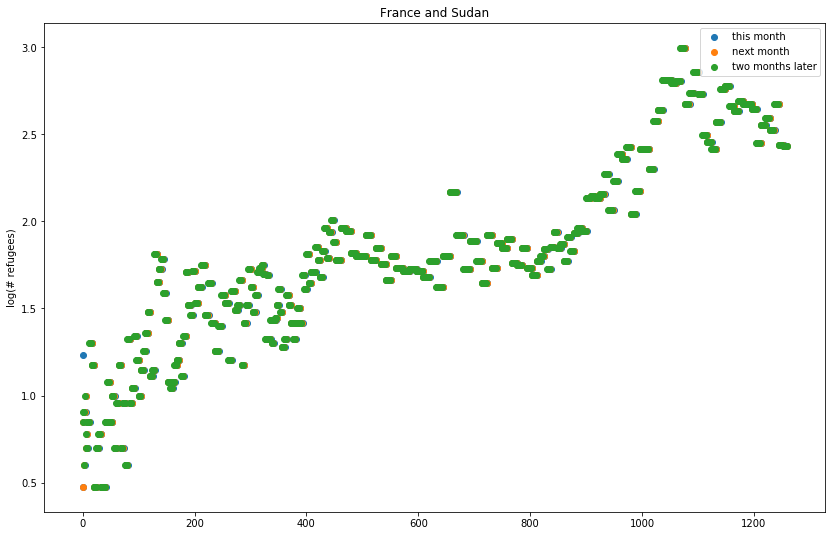

In [23]:
plt.figure(figsize=(14,9))
plt.scatter([i for i in range(len(group_dict[('Sudan', 'France')]))], \
            np.log10(group_dict[('Sudan', 'France')].Value), label ='this month' )
plt.scatter([i for i in range(len(group_dict[('Sudan', 'France')]))], \
            np.log10(group_dict[('Sudan', 'France')].next_month), label ='next month' )
plt.scatter([i for i in range(len(group_dict[('Sudan', 'France')]))], \
            np.log10(group_dict[('Sudan', 'France')].two_months_later), label ='two months later' )
plt.title('France and Sudan')
plt.ylabel('log(# refugees)')
plt.legend(loc='best')

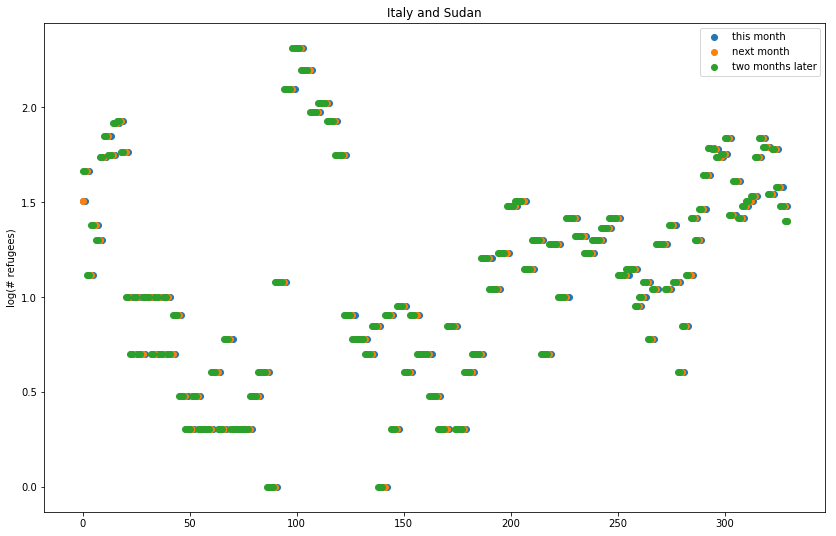

In [24]:
plt.figure(figsize=(14,9))
plt.scatter([i for i in range(len(group_dict[('Sudan', 'Italy')]))], \
            np.log10(group_dict[('Sudan', 'Italy')].Value), label ='this month' )
plt.scatter([i for i in range(len(group_dict[('Sudan', 'Italy')]))], \
            np.log10(group_dict[('Sudan', 'Italy')].next_month), label ='next month' )
plt.scatter([i for i in range(len(group_dict[('Sudan', 'Italy')]))], \
            np.log10(group_dict[('Sudan', 'Italy')].two_months_later), label ='two months later' )
plt.title('Italy and Sudan')
plt.ylabel('log(# refugees)')
plt.legend(loc='best')

In [ ]:
plt.figure(figsize=(14,9))
plt.scatter([i for i in range(len(group_dict[('Sudan', 'UK')]))], \
            np.log10(group_dict[('Sudan', 'UK')].Value), label ='this month' )
plt.scatter([i for i in range(len(group_dict[('Sudan', 'UK')]))], \
            np.log10(group_dict[('Sudan', 'UK')].next_month), label ='next month' )
plt.scatter([i for i in range(len(group_dict[('Sudan', 'UK')]))], \
            np.log10(group_dict[('Sudan', 'UK')].two_months_later), label ='two months later' )
plt.title('USA and Sudan')
plt.ylabel('log(# refugees)')
plt.legend(loc='best')

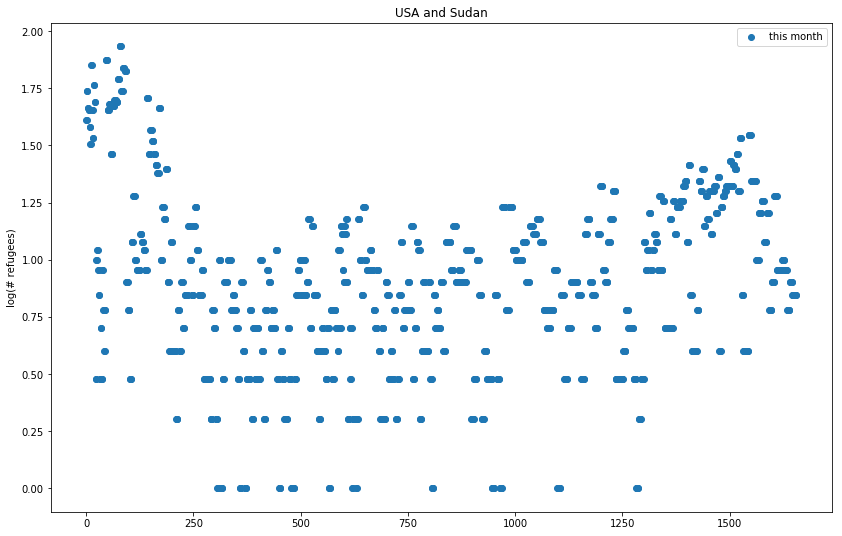

In [21]:
plt.figure(figsize=(14,9))
plt.scatter([i for i in range(len(group_dict[('Sudan', 'USA')]))], \
            np.log10(group_dict[('Sudan', 'USA')].Value), label ='this month' )
plt.scatter([i for i in range(len(group_dict[('Sudan', 'USA')]))], \
            np.log10(group_dict[('Sudan', 'USA')].next_month), label ='next month' )
plt.scatter([i for i in range(len(group_dict[('Sudan', 'USA')]))], \
            np.log10(group_dict[('Sudan', 'USA')].two_months_later), label ='two months later' )
plt.title('USA and Sudan')
plt.ylabel('log(# refugees)')
plt.legend(loc='best')

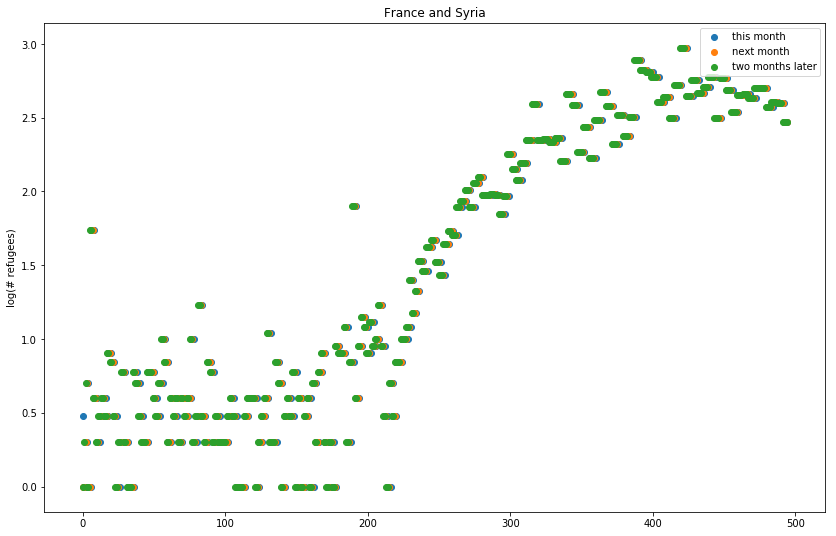

In [42]:
plt.figure(figsize=(14,9))
plt.scatter([i for i in range(len(group_dict[('Syrian Arab Rep.', 'France')]))], \
            np.log10(group_dict[('Syrian Arab Rep.', 'France')].Value), label ='this month' )
plt.scatter([i for i in range(len(group_dict[('Syrian Arab Rep.', 'France')]))], \
            np.log10(group_dict[('Syrian Arab Rep.', 'France')].next_month), label ='next month' )
plt.scatter([i for i in range(len(group_dict[('Syrian Arab Rep.', 'France')]))], \
            np.log10(group_dict[('Syrian Arab Rep.', 'France')].two_months_later), label ='two months later' )
plt.title('France and Syria')
plt.ylabel('log(# refugees)')
plt.legend(loc='best')

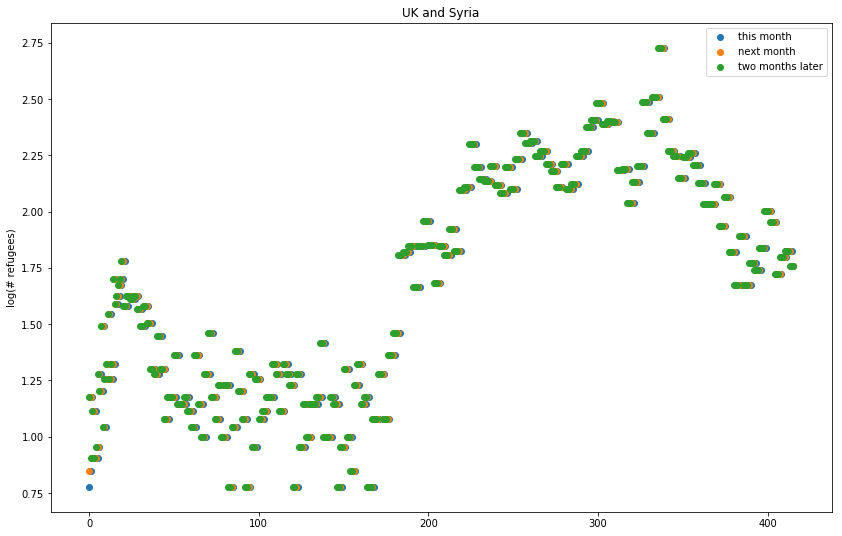

In [40]:
plt.figure(figsize=(14,9))
plt.scatter([i for i in range(len(group_dict[('Syrian Arab Rep.', 'UK')]))], \
            np.log10(group_dict[('Syrian Arab Rep.', 'UK')].Value), label ='this month' )
plt.scatter([i for i in range(len(group_dict[('Syrian Arab Rep.', 'UK')]))], \
            np.log10(group_dict[('Syrian Arab Rep.', 'UK')].next_month), label ='next month' )
plt.scatter([i for i in range(len(group_dict[('Syrian Arab Rep.', 'UK')]))], \
            np.log10(group_dict[('Syrian Arab Rep.', 'UK')].two_months_later), label ='two months later' )
plt.title('UK and Syria')
plt.ylabel('log(# refugees)')
plt.legend(loc='best')

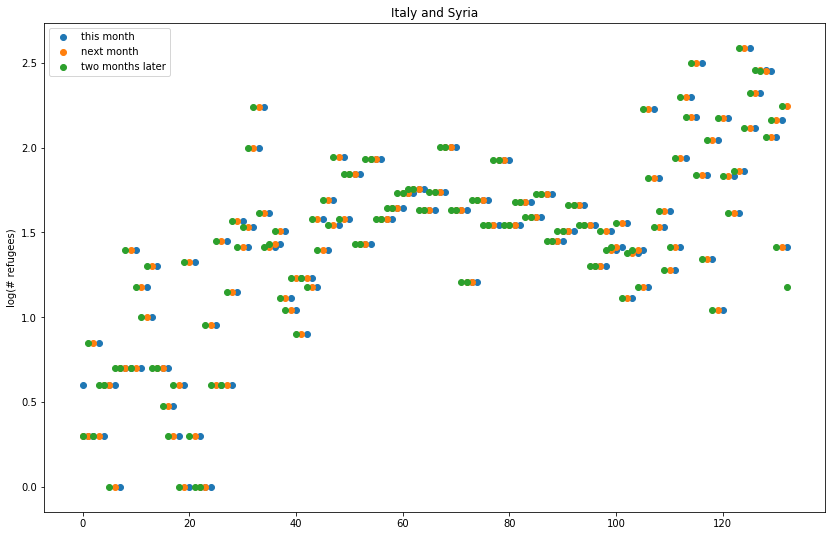

In [39]:
plt.figure(figsize=(14,9))
plt.scatter([i for i in range(len(group_dict[('Syrian Arab Rep.', 'Italy')]))], \
            np.log10(group_dict[('Syrian Arab Rep.', 'Italy')].Value), label ='this month' )
plt.scatter([i for i in range(len(group_dict[('Syrian Arab Rep.', 'Italy')]))], \
            np.log10(group_dict[('Syrian Arab Rep.', 'Italy')].next_month), label ='next month' )
plt.scatter([i for i in range(len(group_dict[('Syrian Arab Rep.', 'Italy')]))], \
            np.log10(group_dict[('Syrian Arab Rep.', 'Italy')].two_months_later), label ='two months later' )
plt.title('Italy and Syria')
plt.ylabel('log(# refugees)')
plt.legend(loc='best')

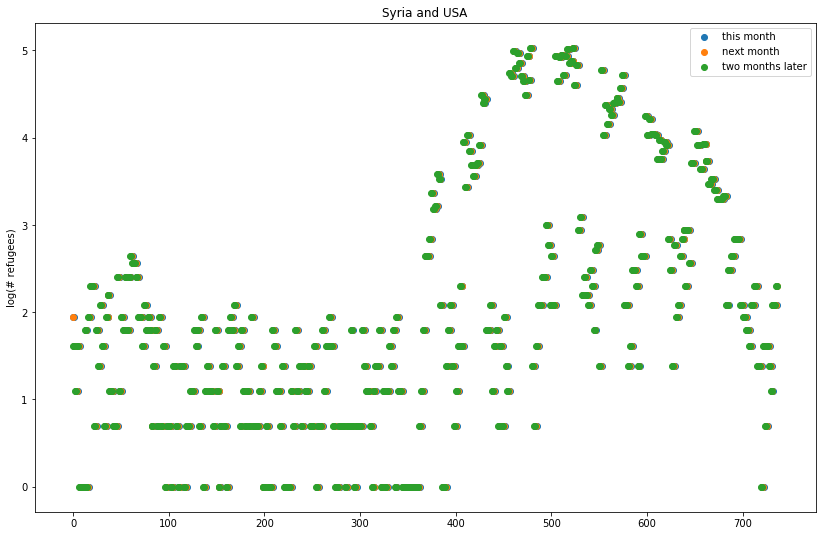

In [36]:
plt.figure(figsize=(14,9))
plt.scatter([i for i in range(len(group_dict[('Syrian Arab Rep.', 'USA')]))], \
            np.log(group_dict[('Syrian Arab Rep.', 'USA')].Value), label ='this month' )
plt.scatter([i for i in range(len(group_dict[('Syrian Arab Rep.', 'USA')]))], \
            np.log(group_dict[('Syrian Arab Rep.', 'USA')].next_month), label ='next month' )
plt.scatter([i for i in range(len(group_dict[('Syrian Arab Rep.', 'USA')]))], \
            np.log(group_dict[('Syrian Arab Rep.', 'USA')].two_months_later), label ='two months later' )
plt.title('Syria and USA')
plt.ylabel('log(# refugees)')
plt.legend(loc='best')

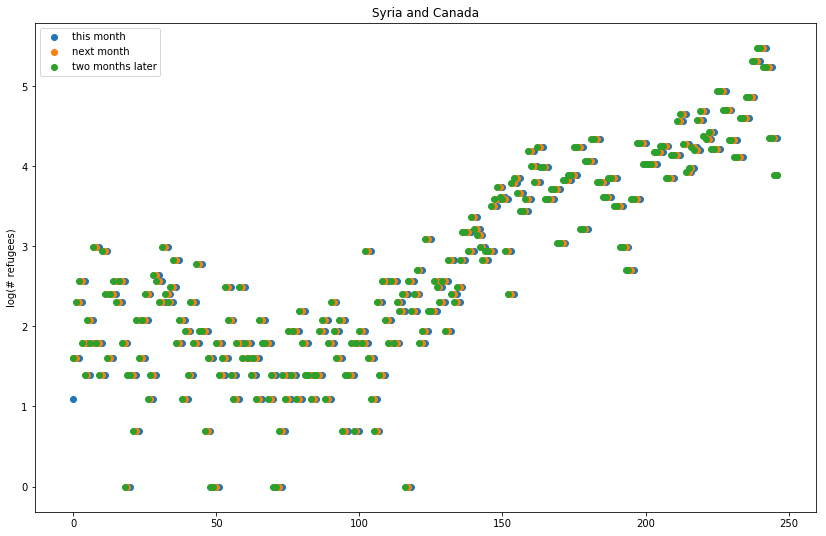

In [73]:
plt.figure(figsize=(14,9))
plt.scatter([i for i in range(len(group_dict[('Syrian Arab Rep.', 'Canada')]))], \
            np.log(group_dict[('Syrian Arab Rep.', 'Canada')].Value), label ='this month' )
plt.scatter([i for i in range(len(group_dict[('Syrian Arab Rep.', 'Canada')]))], \
            np.log(group_dict[('Syrian Arab Rep.', 'Canada')].next_month), label ='next month' )
plt.scatter([i for i in range(len(group_dict[('Syrian Arab Rep.', 'Canada')]))], \
            np.log(group_dict[('Syrian Arab Rep.', 'Canada')].two_months_later), label ='two months later' )
plt.title('Syria and Canada')
plt.ylabel('log(# refugees)')
plt.legend(loc='best')

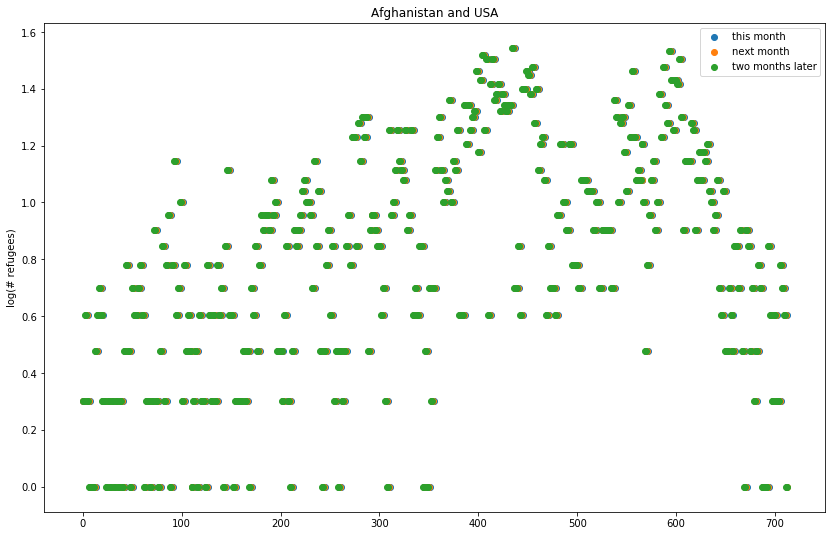

In [37]:
plt.figure(figsize=(14,9))
plt.scatter([i for i in range(len(group_dict[('Afghanistan', 'USA')]))], \
            np.log10(group_dict[('Afghanistan', 'USA')].Value), label ='this month' )
plt.scatter([i for i in range(len(group_dict[('Afghanistan', 'USA')]))], \
            np.log10(group_dict[('Afghanistan', 'USA')].next_month), label ='next month' )
plt.scatter([i for i in range(len(group_dict[('Afghanistan', 'USA')]))], \
            np.log10(group_dict[('Afghanistan', 'USA')].two_months_later), label ='two months later' )
plt.title('Afghanistan and USA')
plt.ylabel('log(# refugees)')
plt.legend(loc='best')

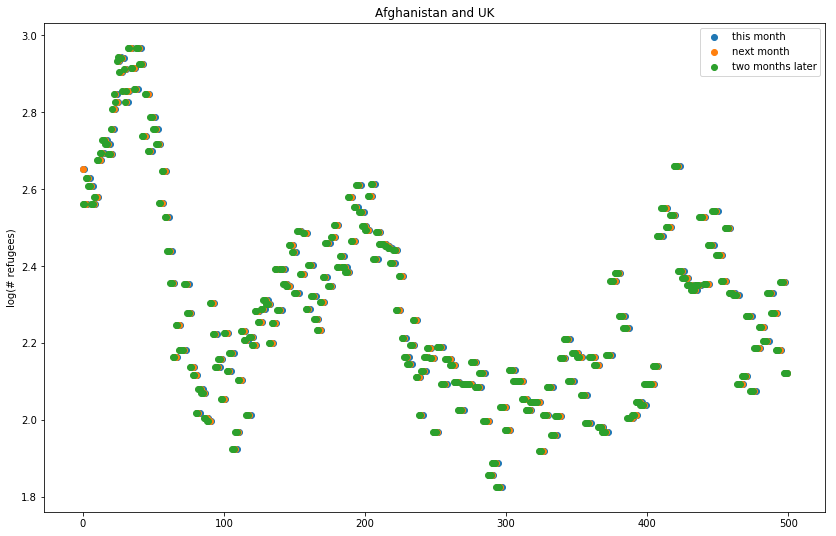

In [41]:
plt.figure(figsize=(14,9))
plt.scatter([i for i in range(len(group_dict[('Afghanistan', 'UK')]))], \
            np.log10(group_dict[('Afghanistan', 'UK')].Value), label ='this month' )
plt.scatter([i for i in range(len(group_dict[('Afghanistan', 'UK')]))], \
            np.log10(group_dict[('Afghanistan', 'UK')].next_month), label ='next month' )
plt.scatter([i for i in range(len(group_dict[('Afghanistan', 'UK')]))], \
            np.log10(group_dict[('Afghanistan', 'UK')].two_months_later), label ='two months later' )
plt.title('Afghanistan and UK')
plt.ylabel('log(# refugees)')
plt.legend(loc='best')

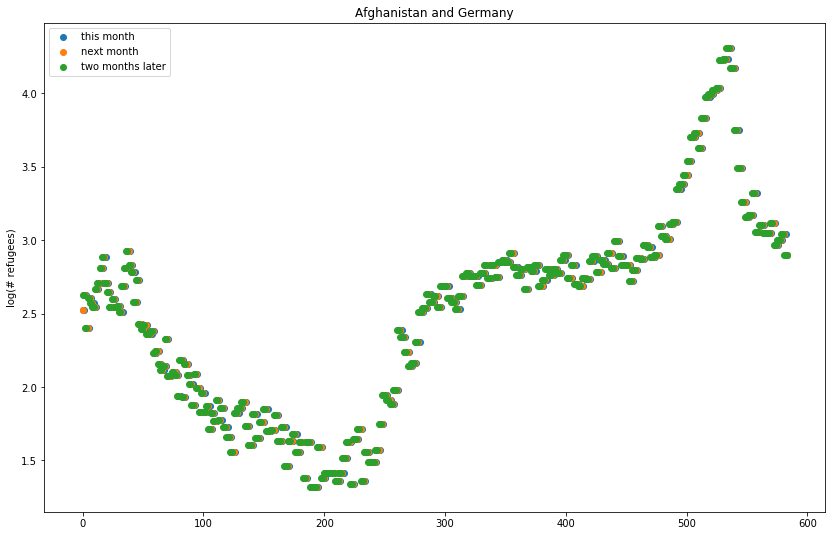

In [38]:
plt.figure(figsize=(14,9))
plt.scatter([i for i in range(len(group_dict[('Afghanistan', 'Germany')]))], \
            np.log10(group_dict[('Afghanistan', 'Germany')].Value), label ='this month' )
plt.scatter([i for i in range(len(group_dict[('Afghanistan', 'Germany')]))], \
            np.log10(group_dict[('Afghanistan', 'Germany')].next_month), label ='next month' )
plt.scatter([i for i in range(len(group_dict[('Afghanistan', 'Germany')]))], \
            np.log10(group_dict[('Afghanistan', 'Germany')].two_months_later), label ='two months later' )
plt.title('Afghanistan and Germany')
plt.ylabel('log(# refugees)')
plt.legend(loc='best')

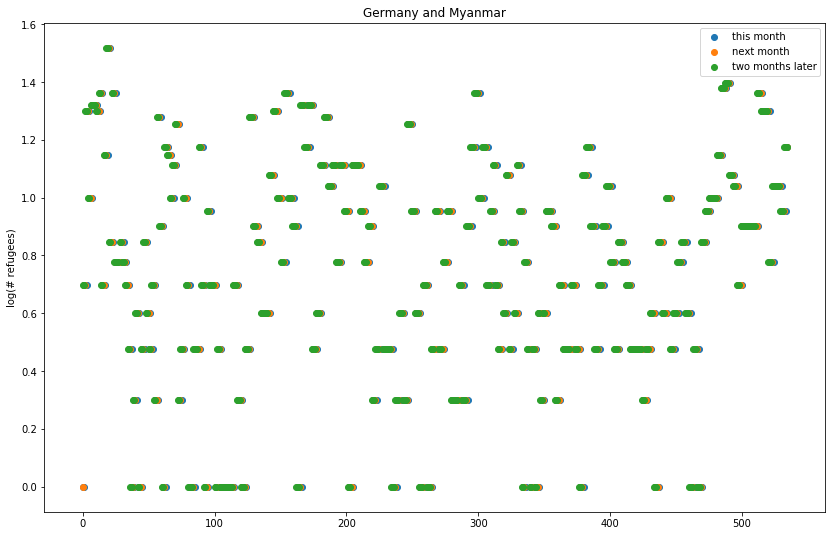

In [43]:
plt.figure(figsize=(14,9))
plt.scatter([i for i in range(len(group_dict[('Myanmar', 'Germany')]))], \
            np.log10(group_dict[('Myanmar', 'Germany')].Value), label ='this month' )
plt.scatter([i for i in range(len(group_dict[('Myanmar', 'Germany')]))], \
            np.log10(group_dict[('Myanmar', 'Germany')].next_month), label ='next month' )
plt.scatter([i for i in range(len(group_dict[('Myanmar', 'Germany')]))], \
            np.log10(group_dict[('Myanmar', 'Germany')].two_months_later), label ='two months later' )
plt.title('Germany and Myanmar')
plt.ylabel('log(# refugees)')
plt.legend(loc='best')

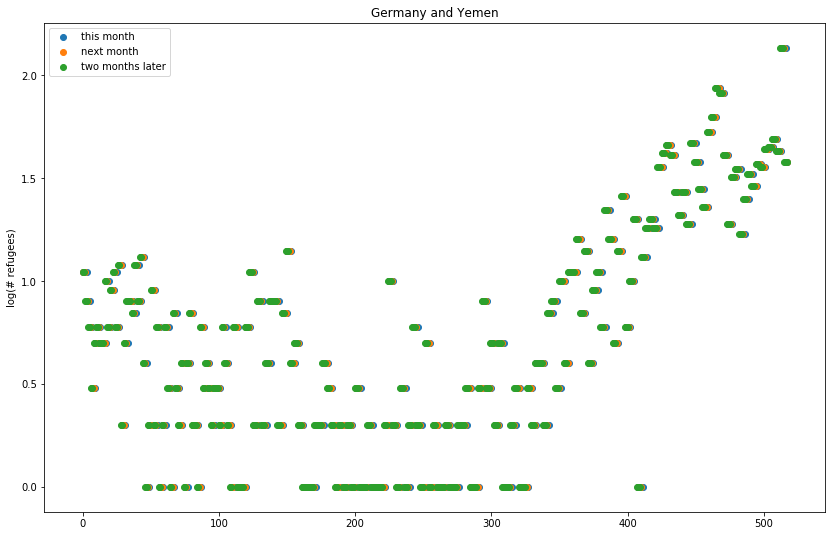

In [45]:
plt.figure(figsize=(14,9))
plt.scatter([i for i in range(len(group_dict[('Yemen', 'Germany')]))], \
            np.log10(group_dict[('Yemen', 'Germany')].Value), label ='this month' )
plt.scatter([i for i in range(len(group_dict[('Yemen', 'Germany')]))], \
            np.log10(group_dict[('Yemen', 'Germany')].next_month), label ='next month' )
plt.scatter([i for i in range(len(group_dict[('Yemen', 'Germany')]))], \
            np.log10(group_dict[('Yemen', 'Germany')].two_months_later), label ='two months later' )
plt.title('Germany and Yemen')
plt.ylabel('log(# refugees)')
plt.legend(loc='best')

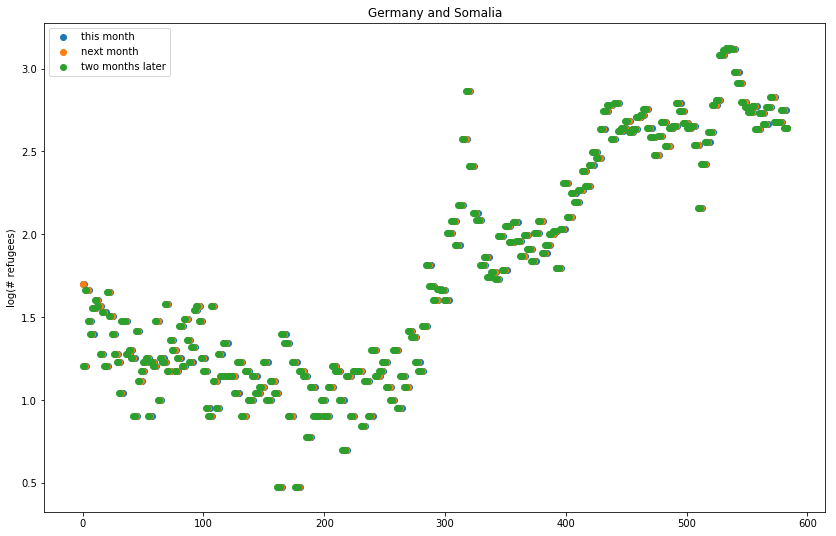

In [46]:
plt.figure(figsize=(14,9))
plt.scatter([i for i in range(len(group_dict[('Somalia', 'Germany')]))], \
            np.log10(group_dict[('Somalia', 'Germany')].Value), label ='this month' )
plt.scatter([i for i in range(len(group_dict[('Somalia', 'Germany')]))], \
            np.log10(group_dict[('Somalia', 'Germany')].next_month), label ='next month' )
plt.scatter([i for i in range(len(group_dict[('Somalia', 'Germany')]))], \
            np.log10(group_dict[('Somalia', 'Germany')].two_months_later), label ='two months later' )
plt.title('Germany and Somalia')
plt.ylabel('log(# refugees)')
plt.legend(loc='best')

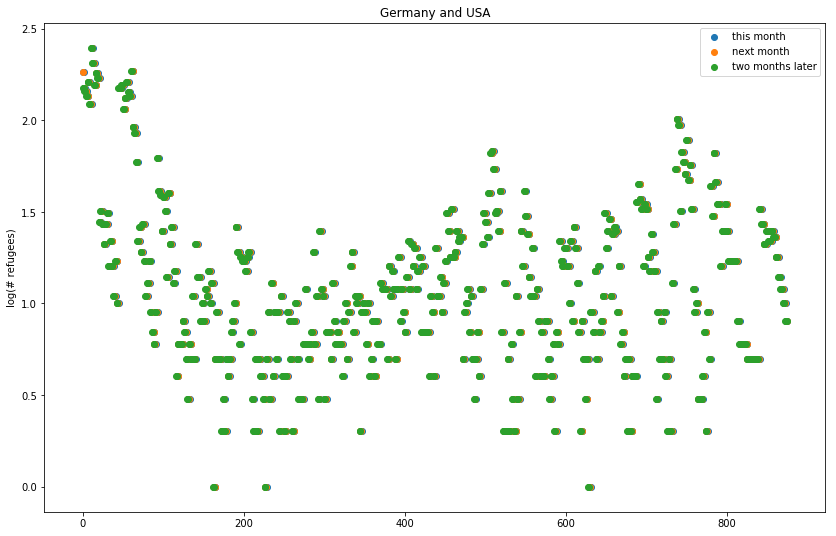

In [47]:
plt.figure(figsize=(14,9))
plt.scatter([i for i in range(len(group_dict[('Somalia', 'USA')]))], \
            np.log10(group_dict[('Somalia', 'USA')].Value), label ='this month' )
plt.scatter([i for i in range(len(group_dict[('Somalia', 'USA')]))], \
            np.log10(group_dict[('Somalia', 'USA')].next_month), label ='next month' )
plt.scatter([i for i in range(len(group_dict[('Somalia', 'USA')]))], \
            np.log10(group_dict[('Somalia', 'USA')].two_months_later), label ='two months later' )
plt.title('Germany and USA')
plt.ylabel('log(# refugees)')
plt.legend(loc='best')

Index(['applied', 'accepted', 'Rejected', 'decisions', 'Year', 'Value'], dtype='object')


KeyError: 'Month'

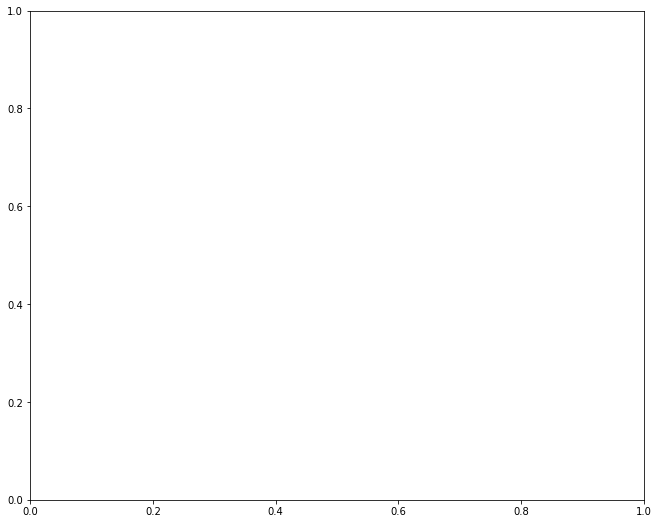

In [72]:
mask = np.zeros_like(group_dict[('Syrian Arab Rep.', 'Germany')][numeric_features], dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)
print(group_dict[('Syrian Arab Rep.', 'Germany')][numeric_features].keys())
# Draw the heatmap with the mask and correct aspect ratio
# sb.heatmap(group_dict[('Syrian Arab Rep.', 'Germany')].sort_values(by='Value',axis=0,ascending=True)\
#             .sort_values(by='Value',axis=1,ascending=False),mask=mask, cmap=cmap, center=0,
#             square=True, linewidths=.5)
# sb.heatmap(group_dict[('Syrian Arab Rep.', 'Germany')][numeric_features] \
#                    ,mask=mask, cmap=cmap, center=0, \
#                 square=True, linewidths=.5)
sb.heatmap(group_dict[('Syrian Arab Rep.', 'Germany')][numeric_features]\
               .sort_values(by='Month',axis=0,ascending=True)\
                .sort_values(by='Month',axis=1,ascending=False),mask=mask, cmap=cmap, center=0,\
                square=True, linewidths=.5)

### Battle Deaths

In [108]:
# file_name = './data/battle_deaths.csv'
# b_deaths = pd.read_csv(file_name, skipinitialspace=True)

In [109]:
# bd_features = ['year', 'deaths', 'battle_location']
# b_deaths = b_deaths[bd_features]
# b_deaths = b_deaths[b_deaths['year']>1999]

In [113]:
# b_deaths.ix[b_deaths.battle_location.str.contains('Yemen'), ['battle_location']] = 'Yemen'
# b_deaths.ix[b_deaths.battle_location.str.contains('Syria'), ['battle_location']] = 'Syrian Arab Rep.'
# b_deaths.ix[b_deaths.battle_location.str.contains('Somalia'), ['battle_location']] = 'Somalia'
# b_deaths.ix[b_deaths.battle_location.str.contains('Myanmar'), ['battle_location']] = 'Myanmar'
# b_deaths.ix[b_deaths.battle_location.str.contains('Afghanistan'), ['battle_location']] = 'Afghanistan'

/Users/jasonterry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/jasonterry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/jasonterry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from th

In [87]:
# total_deaths_yr = {}
# for year in range(2000, 2019):
#     total_deaths_yr[year] = 

['Afghanistan', 'Myanmar', 'Somalia', 'Sudan', 'Syrian Arab Rep.', 'Yemen']

In [116]:
# battle_groups = b_deaths.groupby('battle_location')

In [106]:
# battle_groups

In [117]:
# for (name, df) in battle_groups:
#     print(name, df.head())

Myanmar     year  deaths battle_location
56  2000     114         Myanmar
57  2001      36         Myanmar
58  2002     110         Myanmar
59  2003      38         Myanmar
60  2004      27         Myanmar
Somalia      year  deaths battle_location
486  2004      25         Somalia
492  2010     126         Somalia
557  2001     228         Somalia
558  2002     114         Somalia
559  2006     547         Somalia
Syrian Arab Rep.      year  deaths   battle_location
144  2004     379  Syrian Arab Rep.
164  2016   12105  Syrian Arab Rep.
182  2014   13443  Syrian Arab Rep.
183  2015   11557  Syrian Arab Rep.
337  2016   27190  Syrian Arab Rep.
Yemen      year  deaths battle_location
105  2016    2557           Yemen
106  2017    2317           Yemen
107  2009      94           Yemen
108  2010     175           Yemen
109  2011    1140           Yemen


In [120]:
# merged_2 = pd.merge(final, b_deaths, left_on=['Origin', 'Year'], \
#                   right_on=['battle_location', 'year'])

In [125]:
# merged_2 = merged_2[['destination', 'Origin', 'applied', 'accepted', 'Rejected', 'decisions',\
#                     'Year', 'Month', 'Value', 'deaths']]
# merged_2.deaths = pd.to_numeric(merged_2.deaths)
# merged_2.to_csv('./data/merged_stats_deaths_numbers')

In [126]:
# merged_2.head(10)

destination   Origin applied accepted Rejected decisions  Year     Month  \
0      Canada  Myanmar      11       13        2        15  2000   January   
1      Canada  Myanmar      11       13        2        15  2000   January   
2      Canada  Myanmar      11       13        2        15  2000   January   
3      Canada  Myanmar      11       13        2        15  2000  February   
4      Canada  Myanmar      11       13        2        15  2000  February   
5      Canada  Myanmar      11       13        2        15  2000  February   
6      Canada  Myanmar      11       13        2        15  2000     March   
7      Canada  Myanmar      11       13        2        15  2000     March   
8      Canada  Myanmar      11       13        2        15  2000     March   
9      Canada  Myanmar      11       13        2        15  2000     April   

  Value  deaths  
0     1     114  
1     1      69  
2     1      43  
3     3     114  
4     3      69  
5     3      43  
6     4     114  
7     4      69  
8     4      43  
9     1     114

### Do this before you group